# Data Transforms


# How to Scale Numerical Data

* Data scaling is a recommended pre-processing step when working with many machine learning algorithms.
* Data scaling can be achieved by normalizing or standardizing real-valued input and output variables.
* How to apply standardization and normalization to improve the performance of predictive modeling algorithms.

## Min-Max Scaler

In [1]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define data
data = asarray([[100, 0.001],
[8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])
print(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]


The process begins by importing the necessary tools: asarray from NumPy to handle numerical arrays, and MinMaxScaler from sklearn.preprocessing.

The dataset defined consists of two features (columns) with vastly different scales:
* Column 1: Contains values ranging from 4 to 100.
* Column 2: Contains much smaller values, ranging from 0.001 to 0.1.

When the original data is printed, the output shows a significant disparity. In many machine learning algorithms (like K-Nearest Neighbors or Neural Networks), the larger values in the first column would "overpower" the smaller values in the second column, leading to biased results.

In [2]:
# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


The final output shows the transformed data:
* Every value is now squeezed into a uniform range of 0 to 1.
* The original maximum value (100 in col 1, 0.1 in col 2) becomes 1.0.
* The original minimum value (4 in col 1, 0.001 in col 2) becomes 0.0.
* The relative relationship between the data points remains identical, but the magnitude is standardized.

In [3]:
# visualize a minmax scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

# load the dataset
dataset = read_csv('indians-diabetes.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# summarize
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

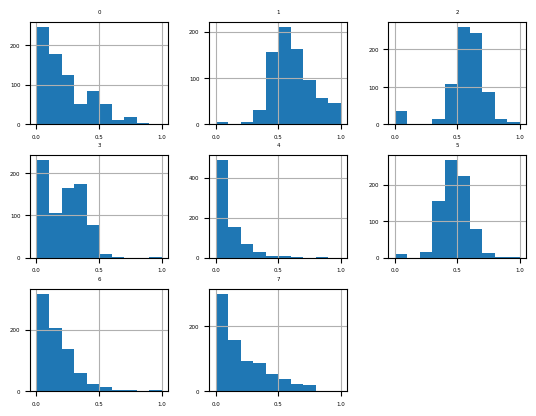

In [4]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

## Data Standardization

In [5]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler

# define data
data = asarray([[100, 0.001],
[8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])
print(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]


The code begins by importing asarray from NumPy and StandardScaler from sklearn.preprocessing.

The input data consists of five samples with two distinct features:
* Feature 1: Large scale values (4, 8, 50, 88, 100).
* Feature 2: Small scale decimal values (0.001, 0.005, 0.05, 0.07, 0.1).

In [6]:
# define standard scaler
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


When looking at the final print(scaled) output, notice the following characteristics:
* Negative and Positive Values: Unlike normalization, standardization results in both positive and negative values.
* Zero as Center: Values close to the original mean become approximately 0. (e.g., the value 50 in the first column becomes exactly 0. because it is the median/center point of that specific distribution).
* Standardized Scale: Both columns are now on a comparable scale, roughly between -1.2 and 1.4, despite their original differences in magnitude.

In [7]:
# visualize a standard scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

# load the dataset
dataset = read_csv('indians-diabetes.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# summarize
print(dataset.describe())

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18  1.503427e-17  1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.590520e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

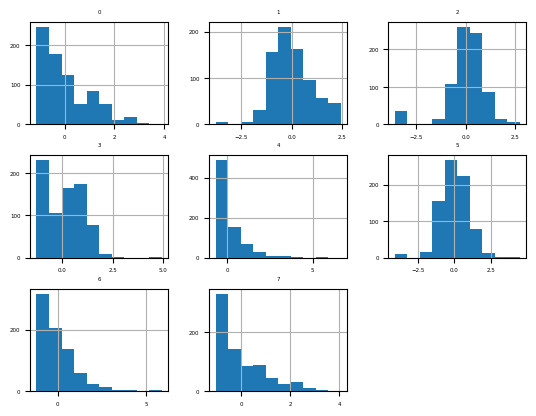

In [8]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

# How to Scale Data with Outliers

* Many machine learning algorithms prefer or perform better when numerical input variables are scaled.
* Robust scaling techniques that use percentiles can be used to scale numerical input variables that contain outliers.
* How to use the RobustScaler to scale numerical input variables using the median and interquartile range.


In [10]:
# visualize a robust scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot

# load dataset
dataset = read_csv('indians-diabetes.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# summarize
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

Running the example first reports a summary of each input variable. We can see that the distributions have been adjusted. The median values are now zero and the standard deviation values are now close to 1.0.

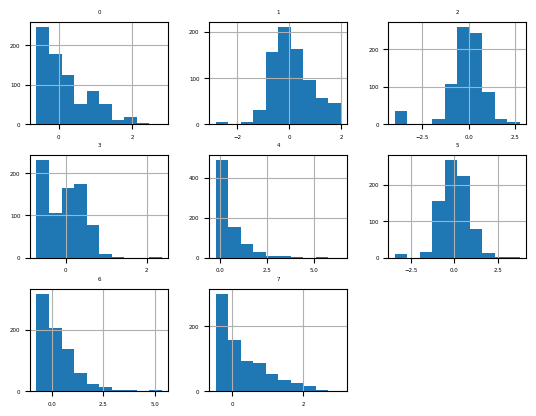

In [11]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

# How to Encode Categorical Data

* Encoding is a required pre-processing step when working with categorical data for machine learning algorithms.
* How to use ordinal encoding for categorical variables that have a natural rank ordering.
* How to use one hot encoding for categorical variables that do not have a natural rank ordering.

| Encoding Method  | Order Required | Columns Created | Typical Use Case   |
| ---------------- | -------------- | --------------- | ------------------ |
| Ordinal Encoding | Yes            | 1               | Ordered categories |
| One-Hot Encoding | No             | k               | Nominal categories |
| Dummy Encoding   | No             | k − 1           | Regression models  |


## Ordinal Encoding

* In ordinal encoding, each unique category value is assigned an integer value. For example, red is 1, green is 2, and blue is 3. This is called an ordinal encoding or an integer encoding and is easily reversible.
* An integer ordinal encoding is a natural encoding for ordinal variables. For categorical variables, it imposes an ordinal relationship where no such relationship may exist.

In [12]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


In [13]:
# define ordinal encoding
encoder = OrdinalEncoder()

# transform data
result = encoder.fit_transform(data)
print(result)

[[2.]
 [1.]
 [0.]]


In [15]:
# ordinal encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)

# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])
print('Output', y.shape)
print(y[:5])

Input (286, 9)
[[2. 2. 2. 0. 1. 2. 1. 2. 0.]
 [3. 0. 2. 0. 0. 0. 1. 0. 0.]
 [3. 0. 6. 0. 0. 1. 0. 1. 0.]
 [2. 2. 6. 0. 1. 2. 1. 1. 1.]
 [2. 2. 5. 4. 1. 1. 0. 4. 0.]]
Output (286,)
[1 0 1 0 1]


## One Hot Encoding

The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and categorical
output variables via the mutual info classif() function. Like f classif(), it can be used in the SelectKBest feature selection strategy (and other strategies).

In [22]:
# example of a one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


In [23]:
# define one hot encoding
encoder = OneHotEncoder(sparse_output=False)

# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [24]:
# one-hot encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse_output=False)
X = onehot_encoder.fit_transform(X)

# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])

Input (286, 43)
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]


## Dummy Variable Encoding


* The one hot encoding creates one binary variable for each category. The problem is that this representation includes redundancy.
* For example, if we know that [1, 0, 0] represents blue and [0, 1, 0] represents green we don't need another binary variable to represent red, instead we could use 0 values alone, e.g. [0, 0].
* This is called a dummy variable encoding, and always represents C categories with C is 1 binary variables.



In [25]:
# example of a dummy variable encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


In [27]:
# define one hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)

# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[[0. 1.]
 [1. 0.]
 [0. 0.]]


# How to Make Distributions More Gaussian

* Many machine learning algorithms prefer or perform better when numerical variables have a Gaussian probability distribution.
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more Gaussian-like probability distribution.
* How to use the PowerTransformer in scikit-learn to use the Box-Cox and Yeo-Johnson transforms when preparing data for predictive modeling.

## Power Transforms - Box-Cox

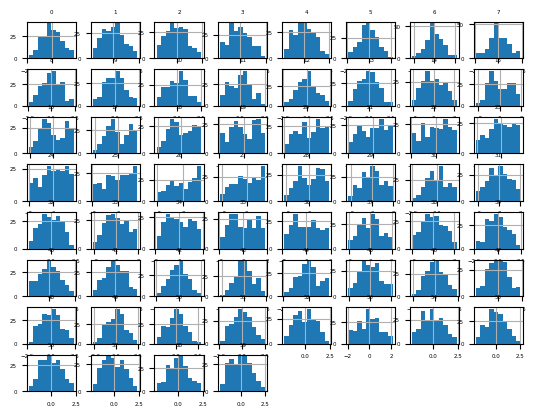

In [28]:
# visualize a box-cox transform of the scaled sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Load dataset
dataset = read_csv('sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

## Power Transforms - Yeo-johnson

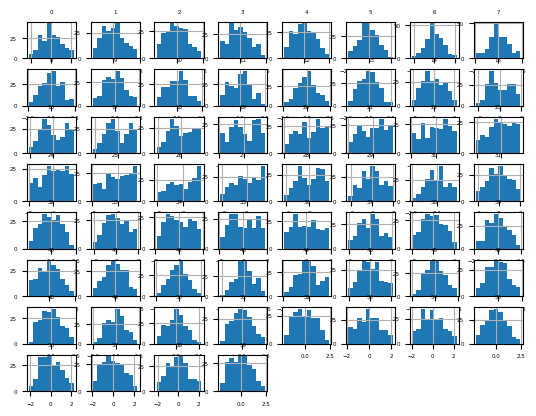

In [29]:
# visualize a yeo-johnson transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# Load dataset
dataset = read_csv('sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()